# Anomaliedetectie a.d.h.v. Twitters 'AnomalyDetection' op de machine temperatuur tijdreeks

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rpy2.robjects import r, pandas2ri
from rpy2 import robjects as ro
from rpy2.robjects.conversion import localconverter

import time

### Inlezen van de data

In [3]:
temperature_data = pd.read_csv('./machine_temperature_system_failure.csv')
print(temperature_data)

                 timestamp      value
0      2013-12-02 21:15:00  73.967322
1      2013-12-02 21:20:00  74.935882
2      2013-12-02 21:25:00  76.124162
3      2013-12-02 21:30:00  78.140707
4      2013-12-02 21:35:00  79.329836
...                    ...        ...
22690  2014-02-19 15:05:00  98.185415
22691  2014-02-19 15:10:00  97.804168
22692  2014-02-19 15:15:00  97.135468
22693  2014-02-19 15:20:00  98.056852
22694  2014-02-19 15:25:00  96.903861

[22695 rows x 2 columns]


### Twitters '*AnomalyDetection*' is geïmplementeerd in R. Om dit te runnen in python gebruiken we de package **rpy2**. Een werkende installatie van R is echter vereist. 

In [4]:
# Inladen van R library en R functie.
lib = r.library("AnomalyDetection")
anom_detect = r['ad_ts']

In [5]:
# Omzetten van Pandas DataFrame naar een R dataframe en uitvoeren van de anomaliedetectie (met tijdsmeting).
# Op deze manier wordt de output automatisch terug omgezet in een Pandas DataFrame.

start_time = time.time()

with localconverter(ro.default_converter + pandas2ri.converter):
    R_df = ro.conversion.py2rpy(temperature_data)
    anoms_temperature_data = anom_detect(R_df, max_anoms = 0.02, direction = "both")
    
execution_time = time.time() - start_time

In [6]:
print(f'Script executed in: {execution_time} seconds')
print('')
print(anoms_temperature_data)

Script executed in: 2.627431869506836 seconds

                    timestamp      anoms
1   2013-12-16 15:25:00+00:00  43.177455
2   2013-12-16 15:30:00+00:00  41.308989
3   2013-12-16 15:35:00+00:00  40.461427
4   2013-12-16 15:40:00+00:00  37.791275
5   2013-12-16 15:45:00+00:00  36.249653
..                        ...        ...
449 2014-02-09 11:30:00+00:00  30.254173
450 2014-02-09 11:35:00+00:00  31.086225
451 2014-02-09 11:40:00+00:00  30.938861
452 2014-02-09 11:45:00+00:00  30.975528
453 2014-02-09 11:50:00+00:00  35.624129

[453 rows x 2 columns]


### Plotten van de data met aanduiding van de gedetecteerde anomalieën

In [7]:
# Kolom met timestamps omzetten naar DateTime types en instellen als index voor het originele DataFrame
temperature_timestamp_index = temperature_data.copy(deep=True)
temperature_timestamp_index['timestamp'] = pd.to_datetime(temperature_timestamp_index['timestamp'])
temperature_timestamp_index = temperature_timestamp_index.set_index('timestamp')

# Timestamp bij anomalieën ook omzetten naar DateTime types
anoms_temperature_data['timestamp'] = pd.to_datetime(anoms_temperature_data['timestamp'])

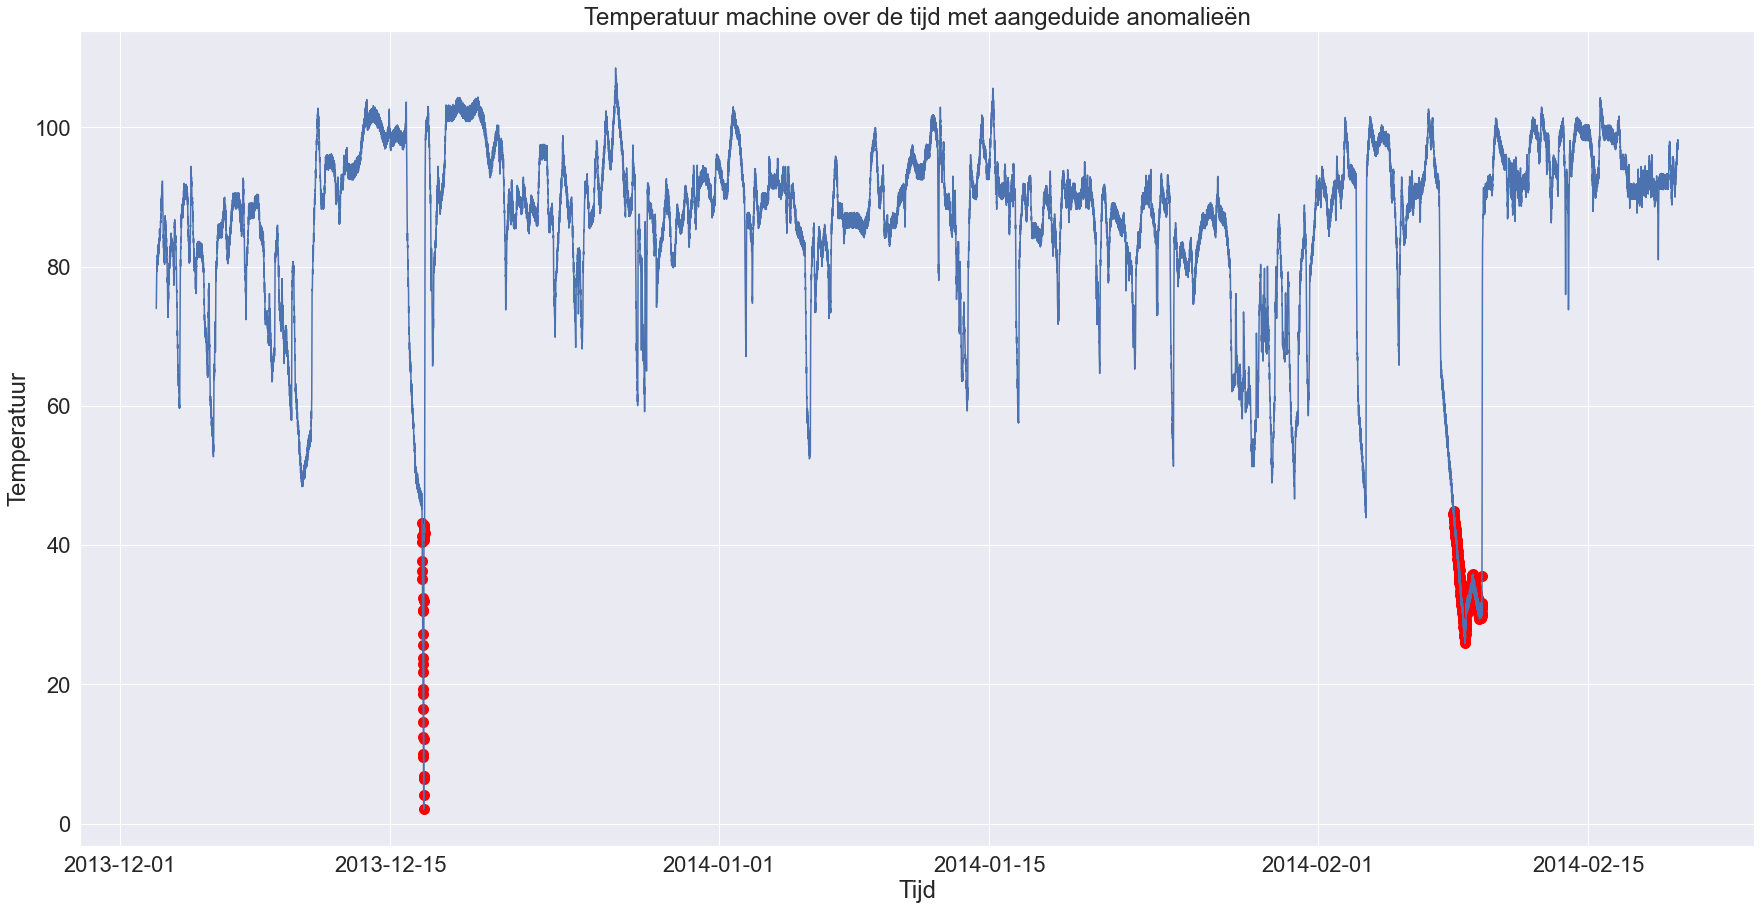

In [8]:
# Plotten van beide grafieken
sns.set(rc={'figure.figsize':(30,15)})
sns.set(font_scale=2)

plt.plot(temperature_timestamp_index.index, temperature_timestamp_index['value'])
plt.scatter(anoms_temperature_data['timestamp'], anoms_temperature_data['anoms'], c='Red', s=100)
plt.xlabel("Tijd")
plt.ylabel("Temperatuur")
plt.title("Temperatuur machine over de tijd met aangeduide anomalieën")
plt.show()